In [1]:
import datetime, os

import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing
from tensorflow.keras.callbacks import Callback

import tensorflow as tf

In [2]:
!pip install tensorflow-addons
import tensorflow_addons as tfa

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import matplotlib.cm as cm

from sklearn.metrics import classification_report, confusion_matrix

In [4]:
SEED = 548
BATCH_SIZE = 64
EPOCHS = 250
LEARNING_RATE = 0.0005
data_path = "E:\DEFENCE\Code\depression.csv"

In [5]:
def set_seed(seed):
    tf.random.set_seed(seed)
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

set_seed(SEED)

In [6]:
def plot_history_acc_loss(history):
    epochs = range(len(history.history['loss']))
    fig, ax = plt.subplots(1,2,figsize=(14,7))
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
                 fontname='monospace',color=colors_dark[0],y=1,x=0.28,alpha=0.8)

    sns.despine()
    ax[0].plot(epochs, train_acc, color=colors_green[1],
               label = 'Training Accuracy')
    ax[0].plot(epochs, val_acc, color=colors_red[1],
               label = 'Validation Accuracy')
    ax[0].legend(frameon=False)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')

    sns.despine()
    ax[1].plot(epochs, train_loss, color=colors_green[1],
               label ='Training Loss')
    ax[1].plot(epochs, val_loss, color=colors_red[1],
               label = 'Validation Loss')
    ax[1].legend(frameon=False)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Training & Validation Loss')

    fig.show()

In [7]:
def plot_history_precision_recall(history):
    epochs = range(len(history.history['loss']))
    fig, ax = plt.subplots(1,2,figsize=(14,7))
    train_acc = history.history['precision']
    train_loss = history.history['recall']
    val_acc = history.history['val_precision']
    val_loss = history.history['val_recall']

    fig.text(s='Epochs vs. Training and Validation Precision/Recall',size=18,fontweight='bold',
                 fontname='monospace',color=colors_dark[0],y=1,x=0.28,alpha=0.8)

    sns.despine()
    ax[0].plot(epochs, train_acc, color=colors_green[1],
               label = 'Training Precision')
    ax[0].plot(epochs, val_acc, color=colors_yellow[1],
               label = 'Validation Precision')
    ax[0].legend(frameon=False)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Training & Validation Precision')

    sns.despine()
    ax[1].plot(epochs, train_loss, color=colors_green[1],
               label ='Training Recall')
    ax[1].plot(epochs, val_loss, color=colors_yellow[1],
               label = 'Validation Recall')
    ax[1].legend(frameon=False)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Training & Validation Recall')

    fig.show()

In [8]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (12, 12), fontsize=14):
    group_counts = ["{0:0.0f}".format(value) for value in
                    confusion_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                         confusion_matrix.flatten() / np.sum(confusion_matrix)]

    labels = [f"{v2}\n{v3}" for v2, v3 in
              zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(len(class_names), len(class_names))

    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=labels, fmt='', cmap='Blues')

    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

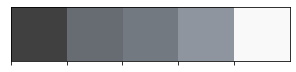

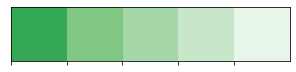

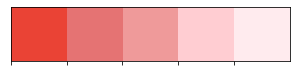

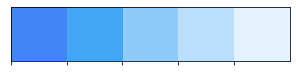

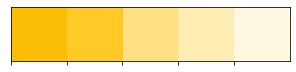

In [9]:
colors_dark = ["#404040", "#676c72", '#737980', '#8e959e', '#f9f9f9']
colors_red = ["#EA4335", "#E57373", '#EF9A9A', '#FFCDD2', '#FFEBEE']
colors_green = ['#34A853','#81C784','#A5D6A7','#C8E6C9','#E8F5E9']
colors_blue = ['#4285F4','#42A5F5','#90CAF9','#BBDEFB','#E3F2FD']
colors_yellow = ['#FBBC04','#FFCA28','#FFE082','#FFECB3','#FFF8E1']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)
sns.palplot(colors_blue)
sns.palplot(colors_yellow)

In [10]:
train_ds = pd.read_csv(data_path)
train_ds.head()

,Index,message,label
0,1,everything is too hard for me life is so hard ...,1
1,2,simonmagus you never need an excuse for a lon...,0
2,3,dubais new airport expected to be the worlds l...,0
3,4,hahah daniel aww you cried thats a sign that ...,0
4,5,ah yeah robpattznews is always on top of this...,0


In [11]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40622 entries, 0 to 40621
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Index    40622 non-null  int64 
 1   message  40622 non-null  object
 2   label    40622 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 952.2+ KB


In [12]:
train_ds.rename(columns = {'message to examine':'message', 'label (depression result)':'label'}, inplace = True)

In [13]:
train_ds = train_ds.reset_index()
label_encoder = preprocessing.LabelEncoder()

In [16]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40622 entries, 0 to 40621
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    40622 non-null  int64 
 1   Index    40622 non-null  int64 
 2   message  40622 non-null  object
 3   label    40622 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


In [17]:
train_ds = train_ds.drop('Index', axis=1)

In [18]:
label_encoder = preprocessing.LabelEncoder()

In [19]:
train_ds['label']= label_encoder.fit_transform(train_ds['label']) 

In [20]:
vocab_size = 23196
embedding_dim = 32
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [21]:
sentences = []
labels = []

training_messages = []
training_labels = []

for index, item in train_ds.iterrows():
  message, label = item["message"], item["label"]
  training_messages.append(str(message))
  training_labels.append(label)

In [22]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_messages)
word_index = tokenizer.word_index

In [23]:
print(len(word_index))

68798


In [24]:
training_messages = tokenizer.texts_to_sequences(training_messages)

training_padded = pad_sequences(training_messages,
                                maxlen=max_length, 
                                truncating=trunc_type, 
                                padding=padding_type
                               )

In [25]:
training_padded = np.array(training_padded)
training_labels_final = np.array(training_labels)

In [26]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=10, verbose=1, mode='max',
)


model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(12)),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='Adamax',metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           742272    
                                                                 
 bidirectional (Bidirectiona  (None, 24)               4320      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 746,617
Trainable params: 746,617
Non-trainable params: 0
_________________________________________________________________


In [28]:
num_epochs = 300
batch_size= 128

In [29]:
history = model.fit(training_padded, training_labels_final, epochs = num_epochs, batch_size = batch_size, callbacks=[ es, model_checkpoint], validation_split=0.2)

Epoch 1/300
254/254 [==============================] - 18s 48ms/step - loss: 0.3753 - accuracy: 0.8446 - precision: 0.9780 - recall: 0.5406 - val_loss: 0.2364 - val_accuracy: 0.9230 - val_precision: 0.9587 - val_recall: 0.8039
Epoch 2/300
254/254 [==============================] - 11s 44ms/step - loss: 0.1988 - accuracy: 0.9294 - precision: 0.9560 - recall: 0.8236 - val_loss: 0.1700 - val_accuracy: 0.9359 - val_precision: 0.9544 - val_recall: 0.8485
Epoch 3/300
254/254 [==============================] - 11s 43ms/step - loss: 0.1507 - accuracy: 0.9431 - precision: 0.9397 - recall: 0.8842 - val_loss: 0.1463 - val_accuracy: 0.9458 - val_precision: 0.9417 - val_recall: 0.8931
Epoch 4/300
254/254 [==============================] - 11s 43ms/step - loss: 0.1296 - accuracy: 0.9523 - precision: 0.9397 - recall: 0.9139 - val_loss: 0.1353 - val_accuracy: 0.9498 - val_precision: 0.9331 - val_recall: 0.9152
Epoch 5/300
254/254 [==============================] - 12s 47ms/step - loss: 0.1189 - accura

C:\Users\VoiDWalker\AppData\Local\Temp\ipykernel_18052\4255163538.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


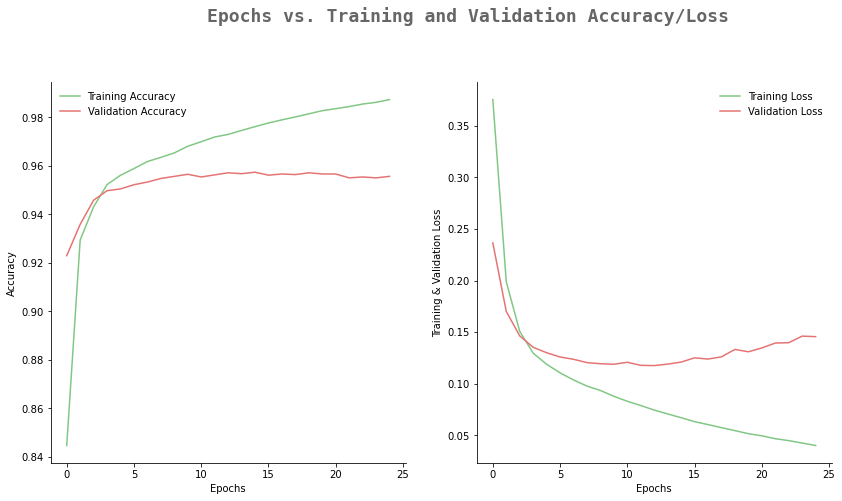

In [30]:
plot_history_acc_loss(history)

C:\Users\VoiDWalker\AppData\Local\Temp\ipykernel_18052\1702371119.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


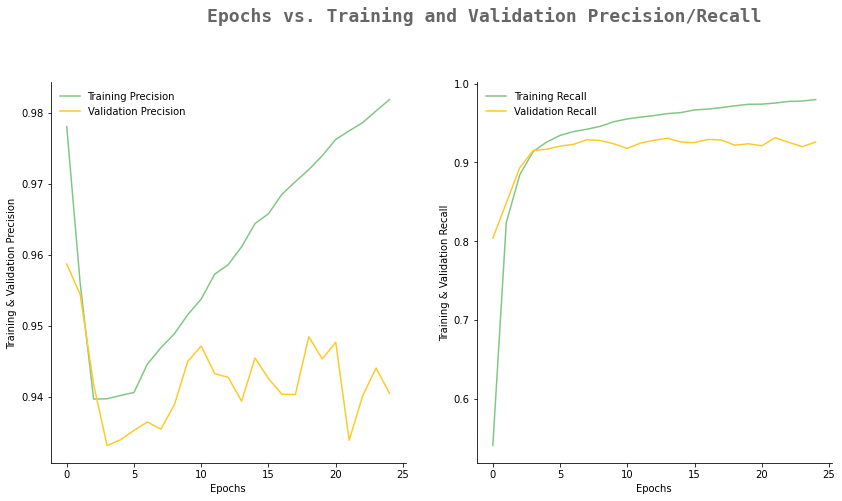

In [31]:
plot_history_precision_recall(history)

1270/1270 [==============================] - 9s 6ms/step


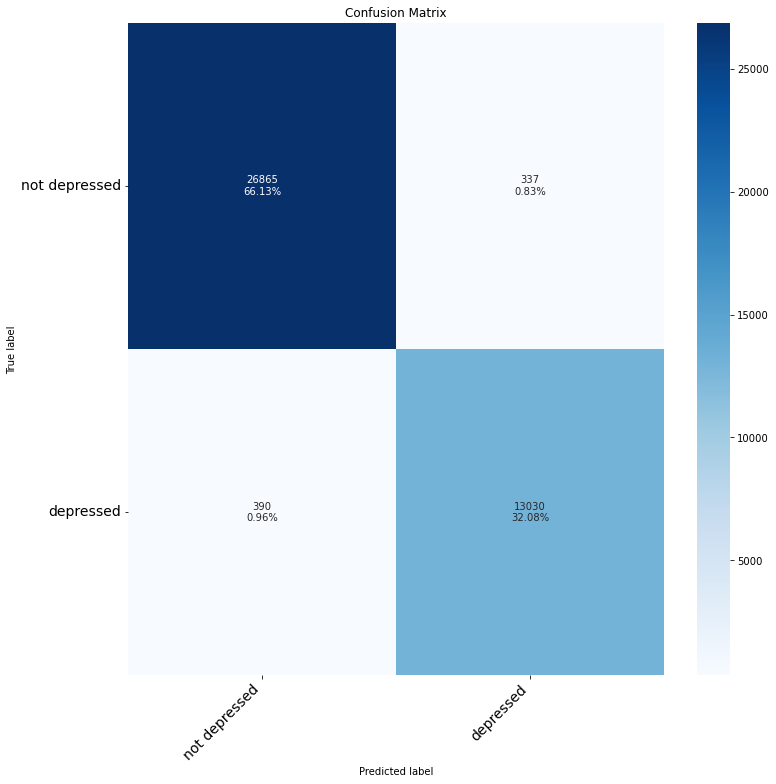

In [32]:
classes = ['not depressed', 'depressed']
test_predictions = model.predict(training_padded)
ground_truth_class_ids = training_labels_final

# take the argmax for each set of prediction scores
# to return the class id of the highest confidence prediction
top_pred_ids = test_predictions.round()
conf_mat = confusion_matrix(ground_truth_class_ids, top_pred_ids)
figure = print_confusion_matrix(conf_mat, classes)
plt.title('Confusion Matrix')
plt.show()